In [1]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

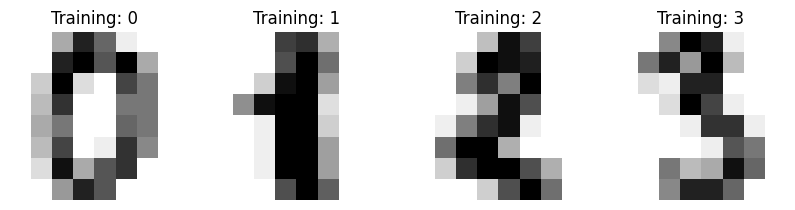

In [2]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

In [3]:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))


In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=.5, shuffle=False
)

In [20]:
X_test.max()

np.float64(16.0)

In [21]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [24]:
svc = SVC()
nn = MLPClassifier(hidden_layer_sizes=(128, 64))

In [25]:
svc.fit(X_train, y_train)

SVC()

In [26]:
nn.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(128, 64))

In [27]:
(svc.predict(X_train) == y_train).mean(), (nn.predict(X_train) == y_train).mean()

(np.float64(0.9988864142538976), np.float64(1.0))

In [28]:
(svc.predict(X_test) == y_test).mean(), (nn.predict(X_test) == y_test).mean()

(np.float64(0.9610678531701891), np.float64(0.9421579532814238))

In [29]:
import pickle


In [30]:
pickle.dump(svc, open("../models/mnist_svc.pkl", "wb"))

In [31]:
pickle.dump(nn, open("../models/mnist_nn.pkl", "wb"))

In [33]:
from sklearn.decomposition import PCA


In [34]:
pca = PCA()

In [35]:
X_train_pca = pca.fit_transform(X_train)

In [36]:
X_test_pca = pca.transform(X_test)

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [38]:
rf = RandomForestClassifier()
kn = KNeighborsClassifier()
lr = LogisticRegression()

In [39]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
kn.fit(X_train, y_train)

KNeighborsClassifier()

In [41]:
lr.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [42]:
(rf.predict(X_train) == y_train).mean(), (rf.predict(X_test) == y_test).mean()

(np.float64(1.0), np.float64(0.92880978865406))

In [43]:
(kn.predict(X_train) == y_train).mean(), (kn.predict(X_test) == y_test).mean()

(np.float64(0.9888641425389755), np.float64(0.9555061179087876))

In [44]:
(lr.predict(X_train) == y_train).mean(), (lr.predict(X_test) == y_test).mean()

(np.float64(1.0), np.float64(0.9299221357063404))

In [45]:
pickle.dump(rf, open("../models/mnist_pca_rf.pkl", "wb"))

In [46]:
pickle.dump(kn, open("../models/mnist_pca_kneighbours.pkl", "wb"))

In [47]:
pickle.dump(lr, open("../models/mnist_pca_logistic_regression.pkl", "wb"))